## 创建测试集

In [1]:
import pandas as pd
import os

HOUSING_PATH=os.path.join("datasets","housing")

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv");
    return pd.read_csv(csv_path)

housing=load_housing_data()

In [3]:
from sklearn.model_selection import train_test_split
trans_set,train_set=train_test_split(housing,test_size=0.2,random_state=42)
housing=train_set.copy()

### 数据可视化

In [5]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [6]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

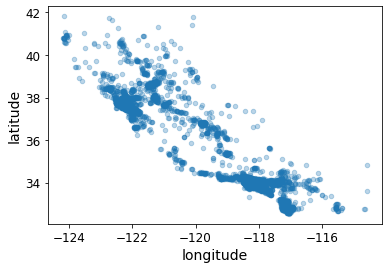

In [19]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.3)
plt.show()

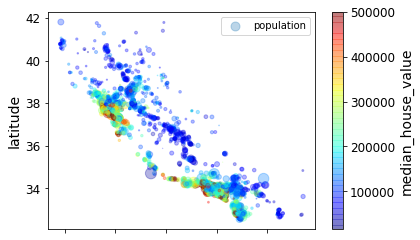

In [22]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.3,s=housing["population"]/100,label='population',
             c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.show()

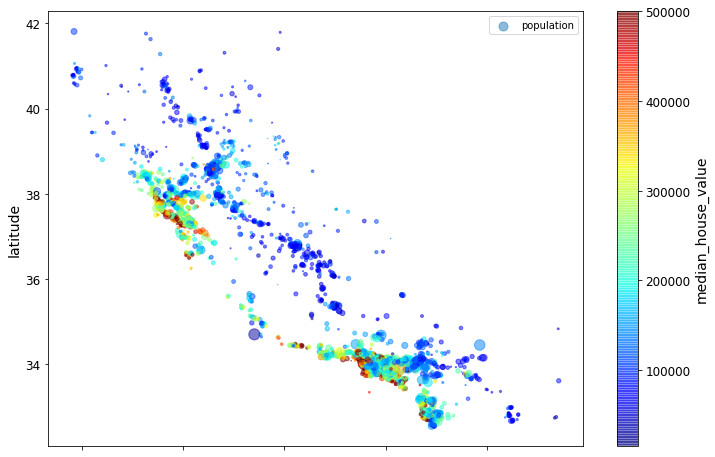

In [41]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.5,s=housing["population"]/100,label="population",c="median_house_value",cmap=plt.get_cmap("jet"),figsize =(12,8))
plt.show()

### 寻找相关性

### 使用corr方法

In [34]:
corr_matrix=housing.corr()

In [39]:
corr_matrix.where(abs(corr_matrix)>0.4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,-0.925351,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing_median_age,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
total_rooms,NaN,NaN,NaN,1.000000,0.929952,0.854351,0.910780,NaN,NaN
total_bedrooms,NaN,NaN,NaN,0.929952,1.000000,0.873576,0.977659,NaN,NaN
population,NaN,NaN,NaN,0.854351,0.873576,1.000000,0.906830,NaN,NaN
households,NaN,NaN,NaN,0.910780,0.977659,0.906830,1.000000,NaN,NaN
median_income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.677502
median_house_value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.677502,1.000000


### 使用Pandas 的scatter_matrix

In [68]:
from pandas.plotting import scatter_matrix

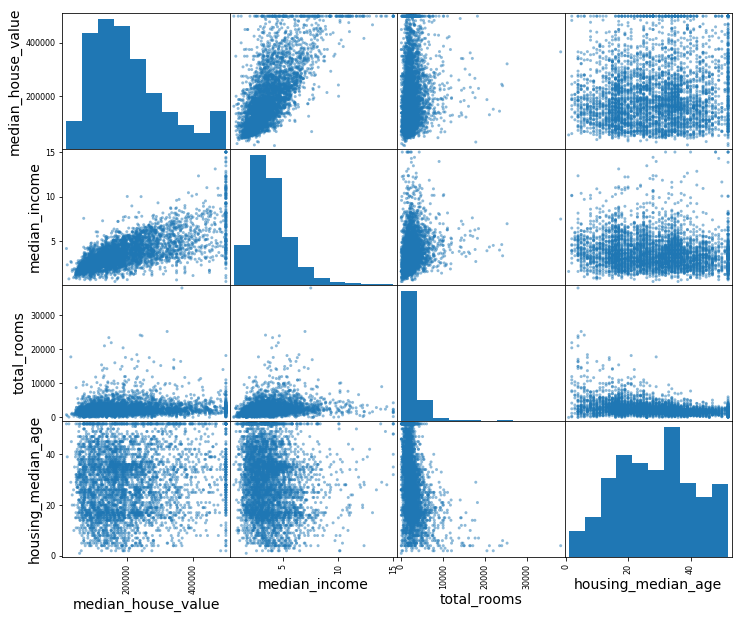

In [69]:
scatter_matrix(housing[['median_house_value',"median_income","total_rooms","housing_median_age"]],figsize=(12,10))
plt.show()

[0, 16, 0, 550000]

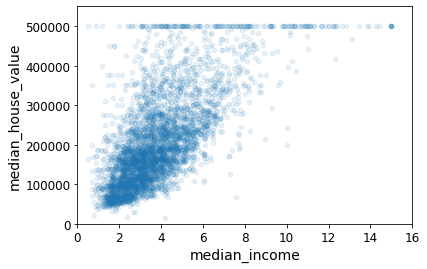

In [56]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

### 属性的组合

In [58]:
housing['rooms_per_household']=housing['total_rooms']/housing['households']
housing['bedroos_per_room']=housing['total_bedrooms']/housing['total_rooms']
housing['population_per_']

In [59]:
housing['rooms_per_household'].head()

20046    4.192201
3024     5.039384
15663    3.977155
20484    6.163636
9814     5.492991
Name: rooms_per_household, dtype: float64

In [76]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household'],
      dtype='object')

In [80]:
corr_matrix=housing.corr()

In [83]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.677502
total_rooms            0.134697
rooms_per_household    0.130928
housing_median_age     0.113585
households             0.074249
total_bedrooms         0.056667
population            -0.019003
longitude             -0.044062
latitude              -0.149295
Name: median_house_value, dtype: float64